In [22]:
import pandas as pd
import seaborn as sns
import time

In [2]:
%%time
df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv")
df.head()

CPU times: total: 7.02 s
Wall time: 9.66 s


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


In [6]:
df.shape

(5498650, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498650 entries, 0 to 5498649
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 797.1+ MB


In [9]:
df["ARREST_DATE"] = df["ARREST_DATE"].astype('datetime64[ns]')

In [10]:
df["ARREST_MONTH"] = df["ARREST_DATE"].dt.month
df["ARREST_YEAR"] = df["ARREST_DATE"].dt.year

In [12]:
df["ARREST_MONTH"].value_counts()

3     500527
5     487597
1     482394
10    474913
8     470016
4     468968
7     457612
6     453637
2     449856
9     443610
11    422072
12    387448
Name: ARREST_MONTH, dtype: int64

In [13]:
df["ARREST_YEAR"].value_counts()

2010    422322
2009    421316
2011    412859
2007    403231
2008    401529
2012    396280
2013    393809
2014    387727
2006    371934
2015    339470
2016    314864
2017    286225
2018    246773
2019    214617
2022    189774
2021    155507
2020    140413
Name: ARREST_YEAR, dtype: int64

In [14]:
df["PD_DESC"].value_counts()

ASSAULT 3                                     460078
MARIJUANA, POSSESSION 4 & 5                   423783
THEFT OF SERVICES, UNCLASSIFIED               303359
CONTROLLED SUBSTANCE, POSSESSION 7            278083
NY STATE LAWS,UNCLASSIFIED VIOLATION          225678
                                               ...  
HIND PROSEC. TERR 2                                1
FAC. SEXUAL OFFENSE W/CONTROLLED SUBSTANCE         1
NYS PROBATION                                      1
LOITERING FOR PROSTITUTION OR                      1
CANNABIS POSSESSION                                1
Name: PD_DESC, Length: 440, dtype: int64

In [15]:
df["OFNS_DESC"].value_counts()

DANGEROUS DRUGS                           1109839
ASSAULT 3 & RELATED OFFENSES               573150
OTHER OFFENSES RELATED TO THEFT            304191
PETIT LARCENY                              255208
FELONY ASSAULT                             244707
                                           ...   
KIDNAPPING AND RELATED OFFENSES                 2
FELONY SEX CRIMES                               2
UNLAWFUL POSS. WEAP. ON SCHOOL                  2
LOITERING,BEGGING                               1
OFFENSES AGAINST MARRIAGE UNCLASSIFIED          1
Name: OFNS_DESC, Length: 90, dtype: int64

In [16]:
df["OFNS_DESC"].value_counts().index

Index(['DANGEROUS DRUGS', 'ASSAULT 3 & RELATED OFFENSES',
       'OTHER OFFENSES RELATED TO THEFT', 'PETIT LARCENY', 'FELONY ASSAULT',
       'OTHER STATE LAWS', 'VEHICLE AND TRAFFIC LAWS', 'DANGEROUS WEAPONS',
       'MISCELLANEOUS PENAL LAW', 'CRIMINAL TRESPASS', 'ROBBERY',
       'OTHER TRAFFIC INFRACTION', 'OFFENSES AGAINST PUBLIC ADMINISTRATION',
       'POSSESSION OF STOLEN PROPERTY 5',
       'CRIMINAL MISCHIEF & RELATED OFFENSES', 'GRAND LARCENY',
       'INTOXICATED & IMPAIRED DRIVING', 'FORGERY', 'BURGLARY',
       'OTHER STATE LAWS (NON PENAL LAW)',
       'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'PROSTITUTION & RELATED OFFENSES', 'SEX CRIMES',
       'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
       'DISORDERLY CONDUCT', 'OFFENSES AGAINST THE PERSON',
       'POSSESSION OF STOLEN PROPERTY', 'OFFENSES AGAINST PUBLIC ADMINI',
       'FRAUDS', 'OFF. AGNST PUB ORD SENSBLTY &',
       'GRAND LARCENY OF MOTOR VEHICLE', 'F.C.A. P.I.N.O.S.',
       '

In [21]:
df["OFNS_DESC"].value_counts().index.str.startswith('(null)').shape

(90,)

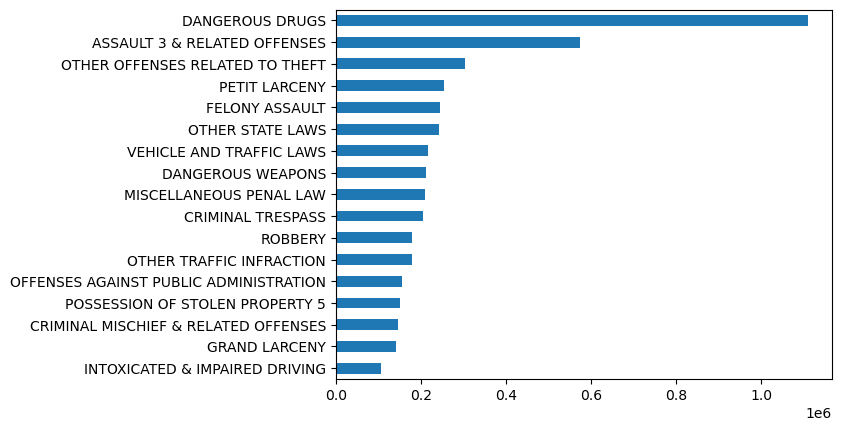

In [29]:
crime_counts = df["OFNS_DESC"].value_counts(ascending = True)
ax = crime_counts[crime_counts > 100000].plot(kind='barh')
#ax.set_xscale('log')

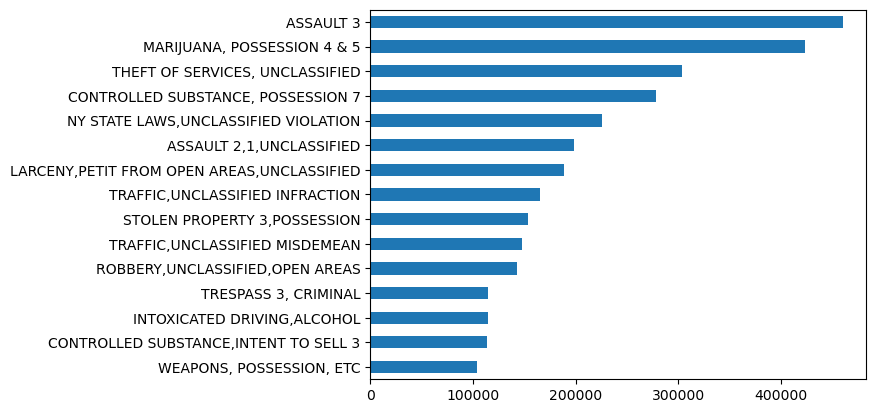

In [30]:
crime_counts = df["PD_DESC"].value_counts(ascending = True)
ax = crime_counts[crime_counts > 100000].plot(kind='barh')
#ax.set_xscale('log')

In [31]:
df["PD_DESC"].value_counts().index

Index(['ASSAULT 3', 'MARIJUANA, POSSESSION 4 & 5',
       'THEFT OF SERVICES, UNCLASSIFIED', 'CONTROLLED SUBSTANCE, POSSESSION 7',
       'NY STATE LAWS,UNCLASSIFIED VIOLATION', 'ASSAULT 2,1,UNCLASSIFIED',
       'LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED',
       'TRAFFIC,UNCLASSIFIED INFRACTION', 'STOLEN PROPERTY 3,POSSESSION',
       'TRAFFIC,UNCLASSIFIED MISDEMEAN',
       ...
       'MISCHIEF,CRIMINAL     UNCLASSI', 'ABORTION 2, 1, SELF',
       'NYC UNCLASSIFIED WARRANT', 'PEDESTRIAN - WALK/DO NOT WALK',
       'RIGHT OF WAY,PEDESTRIAN', 'HIND PROSEC. TERR 2',
       'FAC. SEXUAL OFFENSE W/CONTROLLED SUBSTANCE', 'NYS PROBATION',
       'LOITERING FOR PROSTITUTION OR', 'CANNABIS POSSESSION'],
      dtype='object', length=440)

In [32]:
df["ARREST_PRECINCT"].value_counts()

14     190759
75     186005
44     175305
40     161679
73     147713
        ...  
94      24889
111     24615
123     21907
22       6717
27          1
Name: ARREST_PRECINCT, Length: 78, dtype: int64

In [33]:
df["ARREST_BORO"].value_counts()

K    1523971
M    1477440
B    1257008
Q    1043049
S     197174
Name: ARREST_BORO, dtype: int64

In [36]:
df["AGE_GROUP"].value_counts()

25-44    2591894
18-24    1408371
45-64    1019499
<18       429726
65+        48965
          ...   
1942           1
1024           1
1948           1
1922           1
330            1
Name: AGE_GROUP, Length: 91, dtype: int64

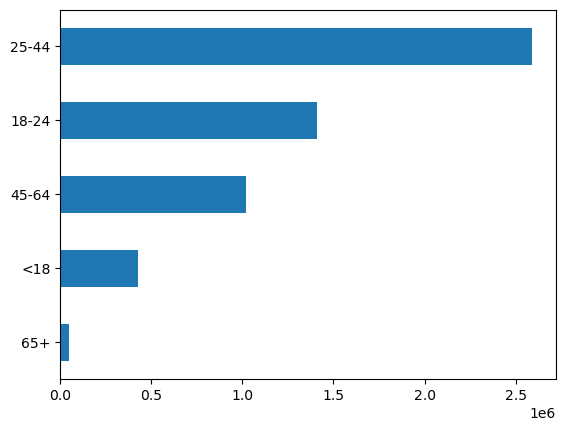

In [42]:
crime_counts = df["AGE_GROUP"].value_counts(ascending = True)
ax = crime_counts[crime_counts > 100].plot(kind='barh')
#ax.set_xscale('log')

In [43]:
df["PERP_SEX"].value_counts()

M    4573998
F     924652
Name: PERP_SEX, dtype: int64

In [44]:
df["PERP_RACE"].value_counts()

BLACK                             2673976
WHITE HISPANIC                    1423743
WHITE                              657104
BLACK HISPANIC                     446257
ASIAN / PACIFIC ISLANDER           231544
UNKNOWN                             52275
AMERICAN INDIAN/ALASKAN NATIVE      12388
OTHER                                1363
Name: PERP_RACE, dtype: int64

In [45]:
df["JURISDICTION_CODE"].value_counts()

0.0     4602559
1.0      470984
2.0      280397
3.0       46606
97.0      33067
72.0      15958
4.0       11450
73.0       6910
69.0       6885
6.0        5501
11.0       3687
7.0        3429
15.0       2774
14.0       2670
71.0       1990
87.0        664
85.0        634
9.0         573
12.0        505
13.0        381
16.0        367
88.0        255
79.0        204
74.0        125
76.0         51
8.0          12
82.0          2
Name: JURISDICTION_CODE, dtype: int64

In [46]:
df["LAW_CAT_CD"].value_counts()

M    3595145
F    1560073
V     294247
I      26728
9        456
Name: LAW_CAT_CD, dtype: int64

In [47]:
df["LAW_CODE"].value_counts()

PL 1200001    434575
PL 2211001    406464
PL 1651503    299821
PL 2200300    299744
PL 1552500    254990
               ...  
TAX18130F2         1
PL 14025CT         1
PL 230300X         1
VTL0402005         1
PL 2407700         1
Name: LAW_CODE, Length: 2521, dtype: int64

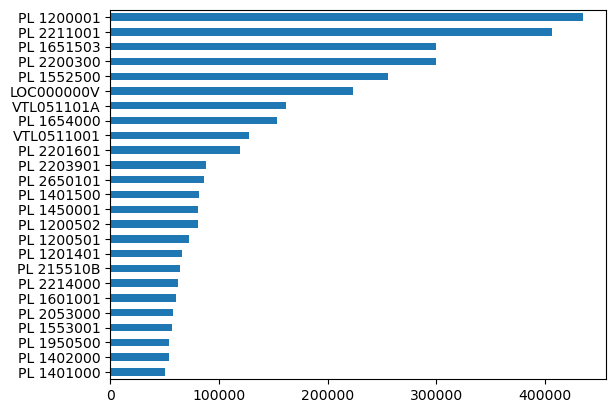

In [52]:
crime_counts = df["LAW_CODE"].value_counts(ascending = True)
ax = crime_counts[crime_counts > 50000].plot(kind='barh')
#ax.set_xscale('log')

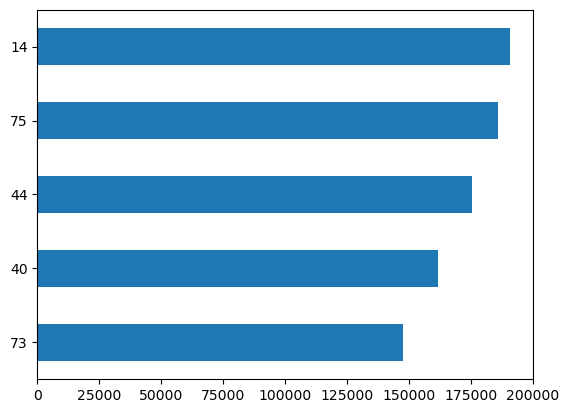

In [58]:
crime_counts = df["ARREST_PRECINCT"].value_counts(ascending = True)
ax = crime_counts.tail(5).plot(kind='barh')
#ax.set_xscale('log')

In [61]:
# 14
df[df["ARREST_PRECINCT"] == 14]["OFNS_DESC"].value_counts(ascending = False).head(5)

OTHER OFFENSES RELATED TO THEFT    29264
POSSESSION OF STOLEN PROPERTY 5    22029
PETIT LARCENY                      21217
OTHER STATE LAWS                   19014
DANGEROUS DRUGS                    15693
Name: OFNS_DESC, dtype: int64

In [62]:
# 75
df[df["ARREST_PRECINCT"] == 75]["OFNS_DESC"].value_counts(ascending = False).head(5)

DANGEROUS DRUGS                    48995
ASSAULT 3 & RELATED OFFENSES       20490
FELONY ASSAULT                     10369
MISCELLANEOUS PENAL LAW             9730
OTHER OFFENSES RELATED TO THEFT     9539
Name: OFNS_DESC, dtype: int64

In [63]:
# 44
df[df["ARREST_PRECINCT"] == 44]["OFNS_DESC"].value_counts(ascending = False).head(5)

DANGEROUS DRUGS                    44264
ASSAULT 3 & RELATED OFFENSES       17390
OTHER OFFENSES RELATED TO THEFT    12476
CRIMINAL TRESPASS                  10949
DANGEROUS WEAPONS                   8670
Name: OFNS_DESC, dtype: int64

In [64]:
# 40
df[df["ARREST_PRECINCT"] == 40]["OFNS_DESC"].value_counts(ascending = False).head(5)

DANGEROUS DRUGS                    42539
ASSAULT 3 & RELATED OFFENSES       17448
OTHER OFFENSES RELATED TO THEFT    16478
CRIMINAL TRESPASS                  15562
DANGEROUS WEAPONS                   7162
Name: OFNS_DESC, dtype: int64

In [65]:
# 73
df[df["ARREST_PRECINCT"] == 73]["OFNS_DESC"].value_counts(ascending = False).head(5)

DANGEROUS DRUGS                    37411
OTHER STATE LAWS                   14708
ASSAULT 3 & RELATED OFFENSES       13260
OTHER OFFENSES RELATED TO THEFT     8496
DANGEROUS WEAPONS                   8261
Name: OFNS_DESC, dtype: int64

In [68]:
df["ARREST_PRECINCT"].value_counts().head(5).index.to_list()

[14, 75, 44, 40, 73]

In [70]:
df[df["ARREST_PRECINCT"].isin(df["ARREST_PRECINCT"].value_counts().head(5).index.to_list())]["OFNS_DESC"].value_counts(ascending = False).head(5)

DANGEROUS DRUGS                    188902
OTHER OFFENSES RELATED TO THEFT     76253
ASSAULT 3 & RELATED OFFENSES        76045
OTHER STATE LAWS                    46948
PETIT LARCENY                       41825
Name: OFNS_DESC, dtype: int64